<center>
<img src="../../img/ods_stickers.jpg" />
    
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 

Authors: [Yury Kashnitskiy](https://yorko.github.io) and [Maxim Keremet](https://www.linkedin.com/in/maximkeremet/). Translated and edited by  [Artem Trunov](https://www.linkedin.com/in/datamove/), and [Aditya Soni](https://www.linkedin.com/in/aditya-soni-0505a9124/). This material is subject to the terms and conditions of the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license. Free use is permitted for any non-commercial purpose.

# <center>Assignment #1. Spring 2019 <br> 

## <center>Exploratory Data Analysis (EDA) of US flights <br> (using Pandas, Matplotlib & Seaborn)

<img src='../../img/plane_sunset.png' width=50%>

Prior to working on the assignment, you'd better check out the corresponding course material:
 - [Exploratory data analysis with Pandas](https://nbviewer.jupyter.org/github/Yorko/mlcourse_open/blob/master/jupyter_english/topic01_pandas_data_analysis/topic1_pandas_data_analysis.ipynb?flush_cache=true), the same as an interactive web-based [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas)
 - [Visualization: from Simple Distributions to Dimensionality Reduction](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_visual_data_analysis.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-visual-data-analysis-in-python)
 - [Overview of Seaborn, Matplotlib and Plotly libraries](https://mlcourse.ai/notebooks/blob/master/jupyter_english/topic02_visual_data_analysis/topic2_additional_seaborn_matplotlib_plotly.ipynb?flush_cache=true), the same as a [Kaggle Kernel](https://www.kaggle.com/kashnitsky/topic-2-part-2-seaborn-and-plotly) 
 - first lectures in [this](https://www.youtube.com/watch?v=QKTuw4PNOsU&list=PLVlY_7IJCMJeRfZ68eVfEcu-UcN9BbwiX) YouTube playlist 
 - you can also practice with demo assignments, which are simpler and already shared with solutions: [A1 demo](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset), [solution](https://www.kaggle.com/kashnitsky/a1-demo-pandas-and-uci-adult-dataset-solution), [A2 demo](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data), [solution](https://www.kaggle.com/kashnitsky/a2-demo-analyzing-cardiovascular-data-solution)

### Your task is to:
 1. write code and perform computations in the cells below
 2. choose answers in the [webform](https://docs.google.com/forms/d/1Q_5rY7Paed4Xc_THtrfE3OSaB3sJerYuJ7NCHtqRbKs). Solutions will be shared only with those who've filled in this form 
 3. submit answers with some email and **remember it**! This will be your ID during the course. Specify your real full name in the form as well (no nicks allowed in the final top-100 [rating](https://mlcourse.ai/rating)). If in doubt, you can re-submit the form till the deadline for A1, no problem, but stick to only one email.
 
### <center> Deadline for A1: 2019 February 24, 20:59 GMT (London time)
    
You'll get up to 12 credits for this assignment - the web-form score will be halved and rounded.

In [67]:
import numpy as np
import pandas as pd
# pip install seaborn 
import seaborn as sns
import matplotlib.pyplot as plt

* Download the data [archive](http://stat-computing.org/dataexpo/2009/2008.csv.bz2) (Archived ~ 114 Mb, unzipped - ~ 690 Mb, [alternative link](https://drive.google.com/file/d/1C5nTzitvJ0ho2Crpqnghg9r2yq98Xxun/view?usp=sharing)). No need to unzip - pandas can unbzip on the fly.
* Place it in the "../../data" folder, or change the path below according to your location.
* The dataset has information about carriers and flights between US airports during the year 2008. 
* Column description is available [here](http://www.transtats.bts.gov/Fields.asp?Table_ID=236). Visit this site to find ex. meaning of flight cancellation codes.

Consider the following terms we use:
* unique flight - a record (row) in the dataset
* completed flight = flight that is not cancelled (Cancelled==0 in the dataset)
* flight code - a combination of ['UniqueCarrier','FlightNum'], i.e.  UA52
* airport code - a three letter airport alias from 'Origin or 'Dest' columns

**Reading data into memory and creating a Pandas ``DataFrame`` object**

(This may take a while, be patient)

We are not going to read in the whole dataset. In order to reduce memory footprint, we instead load only needed columns and cast them to suitable data types.

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [68]:
dtype = {'DayOfWeek': np.uint8, 'DayofMonth': np.uint8, 'Month': np.uint8 , 
         'Cancelled': np.uint8, 'Year': np.uint16, 'FlightNum': np.uint16 , 
         'Distance': np.uint16, 'UniqueCarrier': str, 'CancellationCode': str, 
         'Origin': str, 'Dest': str, 'ArrDelay': np.float16, 
         'DepDelay': np.float16, 'CarrierDelay': np.float16, 
         'WeatherDelay': np.float16, 'NASDelay': np.float16, 
         'SecurityDelay': np.float16, 'LateAircraftDelay': np.float16, 
         'DepTime': np.float16}

In [69]:
%%time
# change the path if needed
path = "C:/Users/Opeyemi/Documents/ML_course_AI/data_notes/jupyter_english/assignments_spring2019/2008 (1).csv.bz2"
flights_df = pd.read_csv(path, usecols=dtype.keys(), dtype=dtype)

Wall time: 4min 57s


**Check the number of rows and columns and print column names.**

In [13]:
print(flights_df.shape)
print(flights_df.columns)

(7009728, 19)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'UniqueCarrier',
       'FlightNum', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'Cancelled', 'CancellationCode', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


**Print first 5 rows of the dataset.**

In [19]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0


**Transpose the frame to see all features at once.**

In [6]:
flights_df.head().T

,0,1,2,3,4
Year,2008,2008,2008,2008,2008
Month,1,1,1,1,1
DayofMonth,3,3,3,3,3
DayOfWeek,4,4,4,4,4
DepTime,2003,754,628,926,1829
UniqueCarrier,WN,WN,WN,WN,WN
FlightNum,335,3231,448,1746,3920
ArrDelay,-14,2,14,-6,34
DepDelay,8,19,8,-4,34
Origin,IAD,IAD,IND,IND,IND


**Examine data types of all features and total dataframe size in memory.**

In [65]:
miss_percent = 100 * (flights_df.isnull().sum()/len(flights_df))

In [66]:
miss_percent

Year                  0.000000
Month                 0.000000
DayofMonth            0.000000
DayOfWeek             0.000000
DepTime               1.943670
UniqueCarrier         0.000000
FlightNum             0.000000
ArrDelay              2.206919
DepDelay              1.943670
Origin                0.000000
Dest                  0.000000
Distance              0.000000
Cancelled             0.000000
CancellationCode     98.039382
CarrierDelay         78.248300
WeatherDelay         78.248300
NASDelay             78.248300
SecurityDelay        78.248300
LateAircraftDelay    78.248300
dtype: float64

**Get basic statistics of each feature.**

In [8]:
flights_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7009728.0,2008.000000,0.000000,2008.0,2008.0,2008.0,2008.0,2008.0
Month,7009728.0,6.375130,3.406737,1.0,3.0,6.0,9.0,12.0
DayofMonth,7009728.0,15.728015,8.797068,1.0,8.0,16.0,23.0,31.0
DayOfWeek,7009728.0,3.924182,1.988259,1.0,2.0,4.0,6.0,7.0
DepTime,6873482.0,NaN,NaN,1.0,928.0,1325.0,1728.0,2400.0
FlightNum,7009728.0,2224.200105,1961.715999,1.0,622.0,1571.0,3518.0,9743.0
ArrDelay,6855029.0,NaN,NaN,-519.0,-10.0,-2.0,12.0,2460.0
DepDelay,6873482.0,NaN,NaN,-534.0,-4.0,-1.0,8.0,2468.0
Distance,7009728.0,726.387029,562.101803,11.0,325.0,581.0,954.0,4962.0
Cancelled,7009728.0,0.019606,0.138643,0.0,0.0,0.0,0.0,1.0


**Count unique Carriers and plot their relative share of flights:**

In [70]:
flights_df['UniqueCarrier'].nunique()

20

In [72]:
flights_df.groupby('UniqueCarrier').size().sort_values(ascending=False)

UniqueCarrier
WN    1201754
AA     604885
OO     567159
MQ     490693
US     453589
DL     451931
UA     449515
XE     374510
NW     347652
CO     298455
EV     280575
9E     262208
FL     261684
YV     254930
OH     197607
B6     196091
AS     151102
F9      95762
HA      61826
AQ       7800
dtype: int64

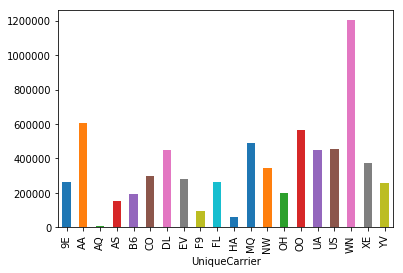

In [10]:
flights_df.groupby('UniqueCarrier').size().plot(kind='bar');

**We can also _group by_ category/categories in order to calculate different aggregated statistics.**

**For example, finding top-3 flight codes, that have the largest total distance travelled in year 2008.**

In [11]:
flights_df.groupby(['UniqueCarrier','FlightNum'])['Distance'].sum().sort_values(
    ascending=False).iloc[:3]

UniqueCarrier  FlightNum
CO             15           1796244.0
               14           1796244.0
UA             52           1789722.0
Name: Distance, dtype: float64

**Another way:**

In [12]:
flights_df.groupby(['UniqueCarrier','FlightNum'])\
  .agg({'Distance': [np.mean, np.sum, 'count'],
        'Cancelled': np.sum})\
  .sort_values(('Distance', 'sum'), ascending=False)\
  .iloc[0:3]

Distance                  Cancelled
                                mean        sum count       sum
UniqueCarrier FlightNum                                        
CO            15         4962.000000  1796244.0   362         0
              14         4962.000000  1796244.0   362         0
UA            52         2465.181818  1789722.0   726         8

**Number of flights by days of week and months:**

In [13]:
pd.crosstab(flights_df.Month, flights_df.DayOfWeek)

DayOfWeek,1,2,3,4,5,6,7
Month,,,,,,,
1,80807,97298,100080,102043,81940,67178,76419
2,81504,79700,80587,82158,102726,66462,76099
3,103210,81159,82307,82831,82936,86153,97494
4,82463,100785,102586,82799,82964,68304,78225
5,80626,79884,81264,102572,102878,84493,74576
6,104168,82160,82902,83617,83930,72322,99566
7,84095,103429,103315,105035,79349,72219,80489
8,82983,80895,81773,82625,103878,86155,93970
9,94300,91533,74057,75589,75881,58343,71205


**It can also be handy to color such tables in order to easily notice outliers:**

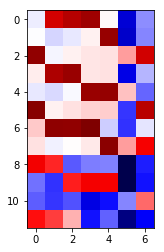

In [14]:
plt.imshow(pd.crosstab(flights_df.Month, flights_df.DayOfWeek),
           cmap='seismic', interpolation='none');

**Flight distance histogram:**

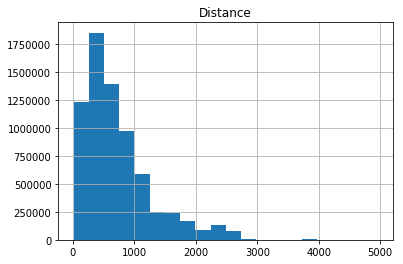

In [15]:
flights_df.hist('Distance', bins=20);

**Making a histogram of flight frequency by date.**

In [21]:
flights_df['Date'] = pd.to_datetime(flights_df.rename(
    columns={'DayofMonth': 'Day'})[['Year', 'Month', 'Day']])

In [23]:
num_flights_by_date = flights_df.groupby('Date').size()

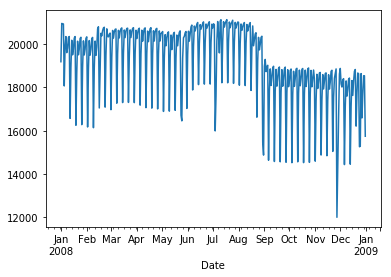

In [28]:
num_flights_by_date.plot()

**Do you see a weekly pattern above? And below?**

In [5]:
num_flights_by_date.rolling(window=7).mean().plot()

NameError: name 'num_flights_by_date' is not defined

### Now it's your turn. Answer the questions below.

**1. How many unique carriers are there in our dataset?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- 10
- 15
- 20
- 25 

In [32]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float16(8), object(4), uint16(3), uint8(4)
memory usage: 441.2+ MB


In [33]:
# Code to determine the number of unique flights
flights_df['UniqueCarrier'].nunique()

20

In [35]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
Date                 datetime64[ns]
dtypes: datetime64[ns](1), float16(8), object(4), uint16(3), uint8(4)
memory usage: 441.2+ MB


**2. We have  both cancelled and completed flights in the datset. Check if there are more completed or cancelled flights. What is the difference?** <br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Take a look at *Cancelled* to see the categories and *FlightNum* column to calculate unique flights for each category.

- Cancelled overweights completed by 329 flights
- Completed overweights cancelled by 6734860 flights
- Cancelled overweights completed by 671 flights
- Completed overweights cancelled by 11088967 flights

In [73]:
# You code here
flights_df['Cancelled'].value_counts().iloc[0] - flights_df['Cancelled'].value_counts().iloc[1]


6734860

**3. Find a flight with the longest departure delays and a flight with the longest arrival delay. Do they have the same destination airport, and if yes, what is its code?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- yes, ATL
- yes, HNL
- yes, MSP
- no

In [74]:
# You code here
print ('Destination Airport for flight with longest DepDelay: ' + str(flights_df[flights_df['DepDelay']==flights_df['DepDelay'].max()]['Dest'].iloc[0]))
print ('Destination Airport for flight with longest ArrDelay: ' + str(flights_df[flights_df['ArrDelay']==flights_df['ArrDelay'].max()]['Dest'].iloc[0]))


Destination Airport for flight with longest DepDelay: MSP
Destination Airport for flight with longest ArrDelay: MSP


**4. Find the carrier that has the greatest number of cancelled flights.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

- AA
- MQ
- WN
- CO 

In [74]:
flights_df[flights_df['Cancelled']==1]['UniqueCarrier'].value_counts().index[0]

'MQ'

In [81]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,2008-01-03
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,2008-01-03


In [75]:
# You code here
#Creating a Hour feature in the dataset from the departure time
flights_df['Hour']=flights_df['DepTime'].astype(str).apply(lambda x: x[:-4])

**5. Let's examine departure time (*DepTime* column). Let's see how all flights are distributed by time. For simplicity, consider distribution by hour. Which hour has the highest percentage of flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q1-5__*

*Hint:* Check time format [here](https://www.transtats.bts.gov/Fields.asp?Table_ID=236).

- 1 am 
- 6 am
- 11 am  
- 3 pm 


In [81]:
flights_df['Hour'].value_counts(normalize=True)

8     0.064086
6     0.063731
11    0.063441
7     0.062299
13    0.062187
9     0.062035
16    0.061916
17    0.061698
10    0.061552
12    0.060523
14    0.059471
15    0.058651
18    0.057175
19    0.055250
20    0.040799
21    0.036357
      0.022268
5     0.021137
22    0.017069
23    0.006577
1     0.000836
4     0.000484
2     0.000264
3     0.000119
24    0.000074
Name: Hour, dtype: float64

**6. OK, now let's examine cancelled flight distribution by time. Which hour has the least percentage of cancelled flights?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 2 am
- 9 pm  
- 8 am  
- 3 am 

In [76]:
flights_df.groupby(['Cancelled'])['Hour'].value_counts(normalize=True)

Cancelled  Hour
0          8       0.065356
           6       0.064994
           11      0.064701
           7       0.063533
           13      0.063424
           9       0.063268
           16      0.063144
           17      0.062921
           10      0.062774
           12      0.061726
           14      0.060652
           15      0.059813
           18      0.058309
           19      0.056343
           20      0.041608
           21      0.037072
           5       0.021557
           22      0.017402
           23      0.006705
                   0.002887
           1       0.000852
           4       0.000493
           2       0.000269
           3       0.000121
           24      0.000076
1                  0.991407
           7       0.000604
           21      0.000597
           19      0.000589
           6       0.000582
           8       0.000575
           15      0.000531
           16      0.000531
           17      0.000531
           18      0.000480
    

In [152]:
# You code here
#We see from the result above that 2am and 4am has the least percentage of cancelled flight


**7. Is there any hour that didn't have any cancelled flights at all? Check all that apply.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

- 3
- 19
- 22
- 4

In [26]:
# You code here

**8. Find the busiest hour, or in other words, the hour when the number of departed flights reaches its maximum.**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- 20
- 21
- 9
- 6

In [158]:
flights_df[flights_df['Cancelled']==0]['Hour'].value_counts(normalize=True)

8     0.065356
6     0.064994
11    0.064701
7     0.063533
13    0.063424
9     0.063268
16    0.063144
17    0.062921
10    0.062774
12    0.061726
14    0.060652
15    0.059813
18    0.058309
19    0.056343
20    0.041608
21    0.037072
5     0.021557
22    0.017402
23    0.006705
      0.002887
1     0.000852
4     0.000493
2     0.000269
3     0.000121
24    0.000076
Name: Hour, dtype: float64

In [181]:
# You code here
flights_df[flights_df['Cancelled']==0].groupby(['Hour'])['DepDelay'].mean()

Hour
       70.750000
1     111.812500
10      5.460938
11      6.683594
12      7.902344
13      8.812500
14     10.351562
15     11.875000
16     11.882812
17     13.210938
18     15.343750
19     16.875000
2     122.562500
20     22.781250
21     23.031250
22     38.031250
23     60.000000
24     70.437500
3      95.812500
4       3.375000
5      -4.253906
6      -1.629883
7       0.102539
8       1.760742
9       3.753906
Name: DepDelay, dtype: float16

**9. Since we know the departure hour, it might be interesting to examine the average delay for corresponding hour. Are there any cases, when the planes on average departed earlier than they should have done? And if yes, at what departure hours did it happen?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider only *completed* flights.

- no, there are no such cases
- yes, at 5-7 am
- yes, at 9-11 am
- yes, at 1-3 pm

In [69]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7009728 entries, 0 to 7009727
Data columns (total 20 columns):
Year                 uint16
Month                uint8
DayofMonth           uint8
DayOfWeek            uint8
DepTime              float16
UniqueCarrier        object
FlightNum            uint16
ArrDelay             float16
DepDelay             float16
Origin               object
Dest                 object
Distance             uint16
Cancelled            uint8
CancellationCode     object
CarrierDelay         float16
WeatherDelay         float16
NASDelay             float16
SecurityDelay        float16
LateAircraftDelay    float16
Route                object
dtypes: float16(8), object(5), uint16(3), uint8(4)
memory usage: 441.2+ MB


In [182]:
# You code here
# You code her

In [197]:
flights_df[(flights_df['UniqueCarrier']=='NW') &  (flights_df['Cancelled']==0)].groupby(['Hour'])['DepTime'].value_counts()

Hour  DepTime
      37.0        85
      36.0        83
      35.0        68
      16.0        57
      30.0        57
      14.0        56
      15.0        55
      17.0        55
      18.0        53
      38.0        50
      34.0        48
      29.0        46
      31.0        46
      43.0        46
      39.0        45
      42.0        45
      19.0        40
      32.0        39
      48.0        38
      47.0        37
      49.0        37
      26.0        36
      44.0        36
      11.0        35
      27.0        31
      40.0        31
      13.0        30
      25.0        30
      33.0        30
      6.0         29
                ... 
9     930.0      453
      932.0      448
      931.0      433
      934.0      377
      935.0      367
      936.0      367
      933.0      356
      937.0      338
      938.0      323
      939.0      287
      959.0      250
      940.0      244
      958.0      235
      957.0      208
      944.0      206
      956.0      197

In [78]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Hour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,9
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,18


In [80]:
flights_df[(flights_df['UniqueCarrier']=='MQ') &  (flights_df['Cancelled']==0)]['Hour'].value_counts()

10    33063
9     32596
11    31863
13    31295
16    31276
6     30982
15    30904
14    30149
12    30043
7     29840
18    29362
17    28864
8     28757
19    25493
20    18664
5     12732
21    12086
22     3471
23      741
        155
1        14
24        8
2         4
Name: Hour, dtype: int64

**10. Considering only the completed flights by the carrier, that you have found in Question 3, find the distribution of these flights by hour. At what time does the greatest number of its planes depart?**<br>

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q6-10__*

*Hint:* Consider *all* flights.

- at noon
- at 6 am
- at 8 pm
- at 9 am

In [188]:
# You code here
# You code here
flights_df[flights_df['DepDelay']==flights_df['DepDelay'].max()]['UniqueCarrier']


2235378    NW
Name: UniqueCarrier, dtype: object

**11. Find top-10 carriers in terms of the number of *completed* flights (_UniqueCarrier_ column)?**

**Which of the listed below is _not_ in your top-10 list?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- DL
- AA
- OO
- EV

In [207]:
# You code here
flights_df[flights_df['Cancelled']==0]['UniqueCarrier'].value_counts().head(10)

WN    1189365
AA     587445
OO     554723
MQ     472362
US     447007
DL     445118
UA     438974
XE     364518
NW     344746
CO     294753
Name: UniqueCarrier, dtype: int64

**12. Plot distributions of flight cancellation reasons (_CancellationCode_).**

**What is the most frequent reason for flight cancellation? (Use this [link](https://www.transtats.bts.gov/Fields.asp?Table_ID=236) to translate codes into reasons)**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

- Carrier
- Weather conditions
- National Air System
- Security reasons

In [8]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Hour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,9
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,18


In [44]:
flights_df[flights_df["Cancelled"]==1]['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

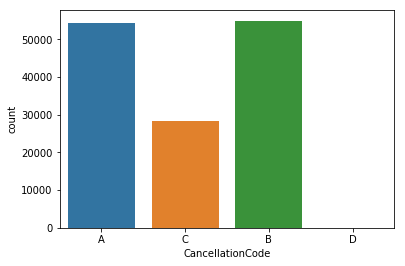

In [51]:
sns.countplot('CancellationCode',data=flights_df)

In [14]:
# You code here

In [20]:
flights_df[['Origin','Dest']]

Origin    7009728
Dest      7009728
dtype: int64

**13. Which route is the most frequent, in terms of the number of flights?**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

*Hint: Take a look at _'Origin'_ and _'Dest'_ features. Consider _A->B_ and _B->A_ directions as _different_ routes)*

 - New-York – Washington (JFK-IAD)
 - San-Francisco – Los-Angeles (LAX-SFO)
 - San-Jose – Dallas (SJC-DFW)
 - New-York – San-Francisco (JFK-SFO)

In [7]:
flights_df['Route']= flights_df['Origin'] + '-> ' + flights_df['Dest']

In [8]:
flights_df['Route'].value_counts().head(5)

SFO-> LAX    13788
LAX-> SFO    13390
OGG-> HNL    12383
LGA-> BOS    12035
BOS-> LGA    12029
Name: Route, dtype: int64

In [152]:
sum(flights_df['WeatherDelay']>0)

99985

In [78]:
# You code here

In [160]:
pd.DataFrame(flights_df[flights_df['DepDelay']>0].groupby(['Route'])['DepDelay'].count()).sort_values(by='DepDelay',ascending=False).head(5)

,DepDelay
Route,
LAX-> SFO,6253
DAL-> HOU,5742
SFO-> LAX,5322
ORD-> LGA,5311
HOU-> DAL,5288


In [9]:
data =flights_df[flights_df['Route'].isin(['LAX-> SFO','DAL-> HOU','SFO-> LAX','ORD-> LGA','HOU-> DAL'])]
sum(data['WeatherDelay']>0)

668

**14. Find top-5 delayed routes (count how many times they were delayed on departure). From all flights on these 5 routes, count all flights with weather conditions contributing to a delay.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

_Hint_: consider only positive delays

- 449 
- 539 
- 549 
- 668

In [11]:
flights_df['Hour'].isnull().sum()

0

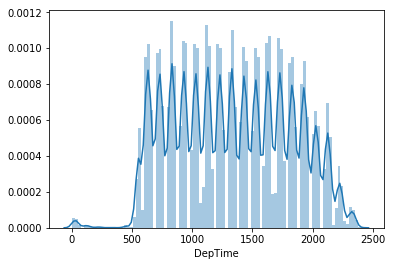

In [19]:
sns.distplot(flights_df['DepTime'].dropna(),bins=100)

**15. Examine the hourly distribution of departure times. For that, create a new series from DepTime, removing missing values.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q11-15__*

**Choose all correct statements:**
 - Flights are normally distributed within time interval [0-23] (Search for: Normal distribution, bell curve).
 - Flights are uniformly distributed within time interval [0-23].
 - In the period from 0 am to 4 am there are considerably less flights than from 7 pm to 8 pm.

In [84]:
# You code here
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Hour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,9
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,18


In [91]:
flights_df[flights_df['Cancelled']==0].groupby(['DayOfWeek'])['Cancelled'].value_counts().sort_values(ascending=False)

DayOfWeek  Cancelled
3          0            1019463
1          0            1015688
4          0            1014340
5          0            1011204
2          0            1008881
7          0             958749
6          0             843969
Name: Cancelled, dtype: int64

In [99]:
#From the above result we see that the number of flights during weekends is less that flights during weekdays and the lowest flight
#Also we see that the lowest flight is on Saturday

flights_df[flights_df['Cancelled']==0].groupby(['Month'])['Cancelled'].value_counts().sort_values(ascending=False)

Month  Cancelled
7      0            617333
8      0            602444
5      0            600064
3      0            599907
6      0            597734
1      0            588457
4      0            587771
10     0            552956
2      0            548640
9      0            530995
12     0            527179
11     0            518814
Name: Cancelled, dtype: int64

    ##Using Visualization to answer Question 16

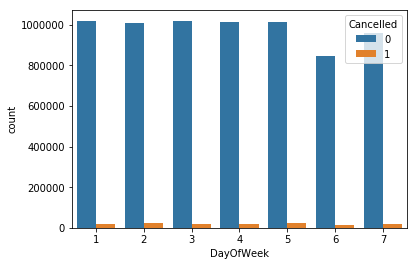

In [100]:
sns.countplot(x='DayOfWeek', hue='Cancelled', data=flights_df);

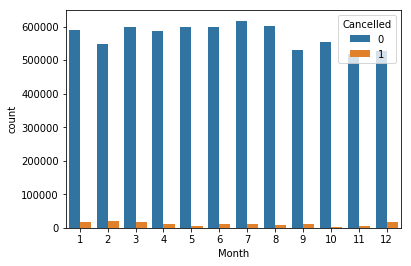

In [102]:
sns.countplot(x='Month', hue='Cancelled', data=flights_df);

# Visualizing the data base on day of the week and month

#### From the visualization above, we can infer that the number of flights during weekends is less than weekdays and Saturday has the lowest number of flights. Also, for the month category, there seems to be more flights during Summer than winter.

**16. Show how the number of flights changes through time (on the daily/weekly/monthly basis) and interpret the findings.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- The number of flights during weekends is less than during weekdays (working days).
- The lowest number of flights is on Sunday.
- There are less flights during winter than during summer.

_Hint_: Look for official meteorological winter months for the Nothern Hemisphsere.

In [127]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Hour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,9
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,18


#### A -  *Carrier*
#### B -  *Weather*
#### C - *National Air System*
#### D - Security

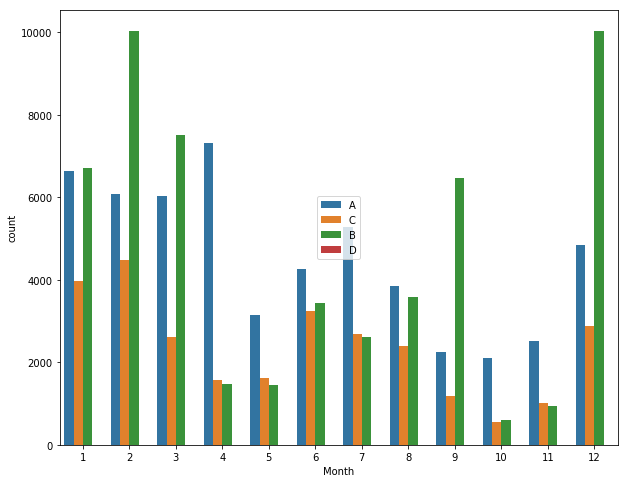

In [131]:
plt.rcParams['figure.figsize']=(10,8)
sns.countplot(x='Month', hue='CancellationCode', data=flights_df[flights_df['Cancelled']==1])
plt.legend(loc=10)

From the Graph above we see that `October` has the lowest cancellation due to Nation Air System, the highest number of cancellations in september was due to Carrier, `April` top cancellation reason is *Carriers*

**17. Examine the distribution of cancellation reasons with time. Make a bar plot of cancellation reasons aggregated by months.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q16-20__*

**Choose all correct statements:**
- October has the lowest number of cancellations due to weather.
- The highest number of cancellations in September is due to Security reasons.
- April's top cancellation reason is carriers.
- Flights cancellations due to National Air System are more frequent than those due to carriers.

In [56]:
# You code here
flights_df[flights_df['Cancelled']==1].groupby(['Month','CancellationCode'])['Cancelled'].count().sort_values(ascending=False).iloc[:4]

Month  CancellationCode
12     B                   10042
2      B                   10034
3      B                    7520
4      A                    7312
Name: Cancelled, dtype: int64

In [40]:
flights_df[(flights_df['Cancelled']==1) &(flights_df['CancellationCode']=='A')].groupby(['Month'])['Cancelled'].count().sort_values(ascending=False).iloc[:1]

Month
4    7312
Name: Cancelled, dtype: int64

**18. Which month has the greatest number of cancellations due to Carrier?** 

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- May
- January
- September
- April

In [54]:
# You code here

data= flights_df[(flights_df['Cancelled']==1) & (flights_df['CancellationCode']=='A')]
data[data['Month']==4].groupby(['UniqueCarrier'])['Cancelled'].count().sort_values(ascending=False).iloc[:1]

UniqueCarrier
AA    3696
Name: Cancelled, dtype: int64

**19. Identify the carrier with the greatest number of cancellations due to carrier in the corresponding month from the previous question.**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- 9E
- EV
- HA
- AA

In [133]:
flights_df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,FlightNum,ArrDelay,DepDelay,Origin,Dest,Distance,Cancelled,CancellationCode,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Hour
0,2008,1,3,4,2003.0,WN,335,-14.0,8.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,20
1,2008,1,3,4,754.0,WN,3231,2.0,19.0,IAD,TPA,810,0,NaN,NaN,NaN,NaN,NaN,NaN,7
2,2008,1,3,4,628.0,WN,448,14.0,8.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,6
3,2008,1,3,4,926.0,WN,1746,-6.0,-4.0,IND,BWI,515,0,NaN,NaN,NaN,NaN,NaN,NaN,9
4,2008,1,3,4,1829.0,WN,3920,34.0,34.0,IND,BWI,515,0,NaN,2.0,0.0,0.0,0.0,32.0,18


In [134]:
flights_df['UniqueCarrier'].nunique()

20

**20. Examine median arrival and departure delays (in time) by carrier. Which carrier has the lowest median delay time for both arrivals and departures? Leave only non-negative values of delay times ('ArrDelay', 'DepDelay').
([Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html) can be helpful in this exercise, as well as it might be a good idea to remove outliers in order to build nice graphs. You can exclude delay time values higher than a corresponding .95 percentile).**

*For discussions, please stick to [ODS Slack](https://opendatascience.slack.com/), channel #mlcourse_ai, pinned thread __#a1_q15-20__*

- EV
- OO
- AA
- AQ

In [140]:
# You code here
flights_df[(flights_df['ArrDelay']>0) & (flights_df['DepDelay']>0)].groupby(['UniqueCarrier'])['ArrDelay','DepDelay'].median().sort_values(by=['ArrDelay','DepDelay'],
                                                                                                                                           ascending=[True, True]).head()

,ArrDelay,DepDelay
UniqueCarrier,,
AQ,10.0,9.0
HA,11.0,9.0
F9,16.0,13.0
WN,16.0,18.0
DL,21.0,18.0


Using pandas, we see that carrier `AQ` has the lowest median delay for both Arrival and Departure. 
Next we use visualization to obtain the solution

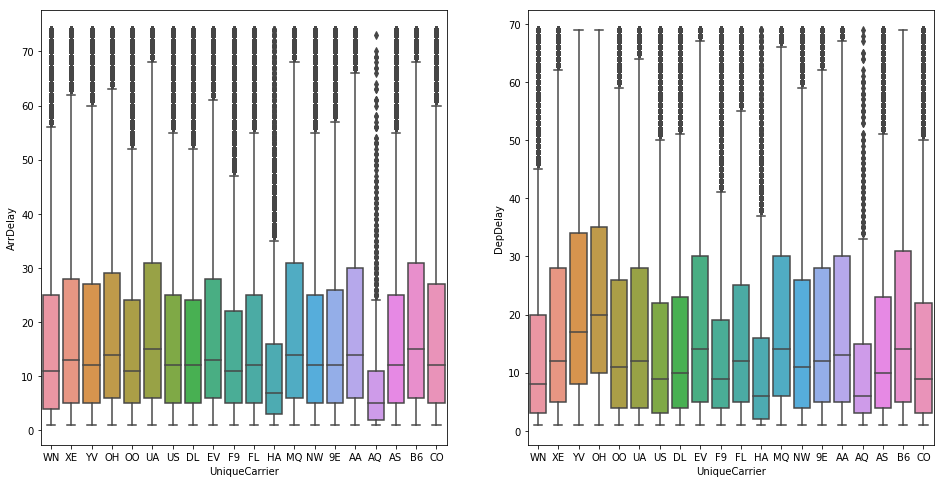

In [146]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
sns.boxplot(x='UniqueCarrier', y='ArrDelay', data=
            flights_df[(flights_df['ArrDelay'] < flights_df['ArrDelay'].quantile(.95)) & (flights_df['ArrDelay']>0)],ax=axes[0]);
sns.boxplot(x='UniqueCarrier', y='DepDelay', data=
            flights_df[(flights_df['DepDelay'] < flights_df['DepDelay'].quantile(.95)) & (flights_df['DepDelay']>0)],ax=axes[1]);

From the Box plot for both the Arrival Delay time and Departure Delay time we see that the Carrier with the lowest median time for both Arrival Delay and Departure Delay is `AQ`

That's it! Now go and do 30 push-ups! :)